In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from gensim.models import Word2Vec
%matplotlib inline

In [3]:
csv = pd.read_csv("./dataset/indb_Grade_VIII_NCERT_Science.csv")
csv.shape

(127, 13)

In [4]:
data = csv[['Segment_Title','Clean_Text']]

In [5]:
data.head(5)

,Segment_Title,Clean_Text
0,Agricultural Practices,Paheli and Boojho went to their uncles house d...
1,Basic Practices Of Crop Production,Cultivation of crops involves several activiti...
2,Preparation Of Soil,The preparation of soil is the first step befo...
3,Agricultural Implements,Before sowing the seeds it is necessary to bre...
4,Sowing,Sowing is the most important part of crop prod...


In [6]:
model = Word2Vec.load("./dataset/clean_books_bigram_Feb_03_2017_sci_ss_no_stop_no_pos_tag.w2v")

In [7]:
data.Segment_Title.unique

<bound method IndexOpsMixin.unique of 0                               Agricultural Practices
1                   Basic Practices Of Crop Production
2                                  Preparation Of Soil
3                              Agricultural Implements
4                                               Sowing
5                        Adding Manure And Fertilisers
6                                           Irrigation
7                                Protection From Weeds
8                                           Harvesting
9                                              Storage
10                                   Food From Animals
11                                      Microorganisms
12                        Where Do Microorganisms Live
13                               Microorganisms And Us
14                              Harmful Microorganisms
15                                   Food Preservation
16                                   Nitrogen Fixation
17                         

In [71]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re

text = data.Clean_Text
word_lists = []
text_vect = []

for i in range(text.shape[0]):
    text[i] = re.sub("[^a-zA-Z]"," ",text[i] ) 
    lower_case = text[i].lower()
    tokenized_sents = word_tokenize(lower_case)
    words = [w for w in tokenized_sents if not w in stopwords.words("english")]
    word_lists.append(words)
word_lists = np.array(word_lists)

word_avgs = []
maxlen = len(max(word_lists,key=len))

for i in range(word_lists.shape[0]):
    words = word_lists[i]
    vect = []
    l=0
    total = 0
    for w in words:
        try:
            vect.append(model[w])
            total = np.add(total,model[w])
            s = model[w].shape
            l=l+1
        except:
            vect.append(np.zeros(s))
    word_avgs.append(np.divide(total,l))
    text_vect.append(np.array(vect))
    """
    if len(vect) < maxlen:
        for k in range(maxlen - len(vect)):
            vect.append(np.zeros(s))
    """
    
text_vect = np.array(text_vect)
word_avgs = np.array(word_avgs)

/home/apurve/.local/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2881: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


In [115]:
word_avgs[0:4]

array([[  1.23560376e-01,  -1.11595809e-01,  -2.54032433e-01, ...,
          1.03055656e-01,   1.51007935e-01,   5.92508852e-01],
       [  7.04489291e-01,  -3.61195356e-01,  -3.33158463e-01, ...,
          3.51453245e-01,  -2.08847895e-02,   9.05702233e-01],
       [  5.05787551e-01,  -5.72174489e-01,  -2.69976169e-01, ...,
          7.10366428e-01,  -6.25442564e-02,   9.11967635e-01],
       [  2.94704586e-01,   6.36376033e-04,  -6.01942539e-01, ...,
          2.03565359e-01,  -3.26837718e-01,   4.24244910e-01]], dtype=float32)

In [55]:
import re, math
from sklearn.metrics.pairwise import cosine_similarity

def sent_to_vect(sent):
    text = re.sub("[^a-zA-Z]"," ",sent ) 
    lower_case = text.lower()
    tokenized_sents = word_tokenize(lower_case)
    words = [w for w in tokenized_sents if not w in stopwords.words("english")]
    return words


In [121]:
q = []
q.append("Multicellular organisms are composed of many cells. True or False.")
q.append("A major threat for the survival of organisms is deforestation.")
q.append("Lightening occurs when negatively changed clouds come in contact of positively charged clouds")
qvect = []
qavgs = []
for k in q:
    words = sent_to_vect(k)
    total = 0
    l = 0
    for w in words:
        try:
            vect.append(model[w])
            total = np.add(total,model[w])
            l=l+1
            s = model[w].shape
        except:
            vect.append(np.zeros(s))
    qavgs.append(np.divide(total,l))
    qvect.append(vect)

In [101]:
c1 = []
c2 = []
c3 = []
for i in range(len(text_vect)):
    c1.append(float(cosine_similarity(word_avgs[i], qavgs[0])))
    c2.append(float(cosine_similarity(word_avgs[i], qavgs[1])))
    c3.append(float(cosine_similarity(word_avgs[i], qavgs[2])))


def max_sim(c):
    mi = []
    tmp = list(c)
    tmp.sort()
    mi.append(c.index(float(tmp[-1])))
    mi.append(c.index(float(tmp[-2])))
    return mi

/home/apurve/anaconda3/envs/nenv/lib/python3.5/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/home/apurve/anaconda3/envs/nenv/lib/python3.5/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/home/apurve/anaconda3/envs/nenv/lib/python3.5/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1,

In [102]:
mi1 = max_sim(c1)
mi2 = max_sim(c2)
mi3 = max_sim(c3)

In [122]:
print("For Sentence -- "+q1)
print(data.loc[mi1,"Segment_Title"])
print("******")
print("For Sentence -- "+q2)
print(data.loc[mi2,"Segment_Title"])
print("******")
print("For Sentence -- "+q3)
print(data.loc[mi3,"Segment_Title"])


For Sentence -- 1. Multicellular organisms are composed of many cells. True or False.
51                       The Cell
53    Cell Structure And Function
Name: Segment_Title, dtype: object
******
For Sentence -- A major threat for the survival of organisms is deforestation.
38     Deforestation And Its Causes
39    Consequences Of Deforestation
Name: Segment_Title, dtype: object
******
For Sentence -- Lightening occurs when negatively changed clouds come in contact of positively charged clouds
75                         Noncontact Forces
98    Types Of Charges And Their Interaction
Name: Segment_Title, dtype: object


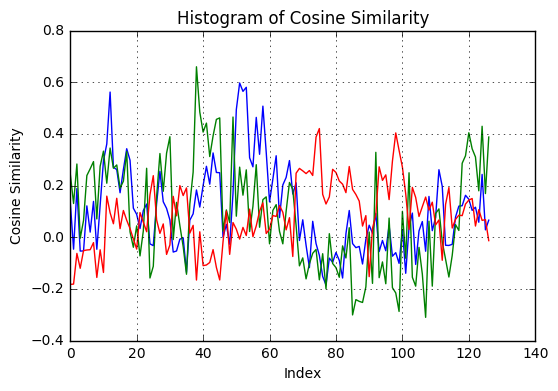

In [123]:
plt.plot(c1)
plt.plot(c2)
plt.plot(c3)
plt.xlabel('Index')
plt.ylabel('Cosine Similarity')
plt.title('Histogram of Cosine Similarity')
plt.grid(True)
plt.savefig("cosin_sim.png")
plt.show()


In [ ]:
"I have 5 cars."